# **Proyek Akhir: Menyelesaikan Permasalahan Institusi Pendidikan**


*   Nama: Muhammad Fadhil Abidin
*   Email: abidinfadhil@gmail.com
*   Id Dicoding: mufiiin
## **Persiapan**

### **Menyiapkan library yang dibutuhkan**

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras_tuner

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import zscore

<ipython-input-3-0eedc2d260f5>:14: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


### **Menyiapkan data yang akan diguankan**

In [ ]:
df = pd.read_csv('drop_out.csv', sep=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


### **Data Understanding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [ ]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [ ]:
df.columns = [col.replace(' ','_').replace("'s",'').replace('\t','').replace('/','_').replace('(','').replace(')','').lower() for col in df.columns]
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_evening_attendance', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mothers_qualification',
       'fathers_qualification', 'mothers_occupation', 'fathers_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_sem_wit

### **Data Preparation / Preprocessing**

In [ ]:
df.describe()

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_1st_sem_without_evaluations,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
threshold = 3

z_scores = zscore(df.select_dtypes(include=[np.number]))
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_2 = df[~outliers].copy()
df_2

,marital_status,application_mode,application_order,course,daytime_evening_attendance,previous_qualification,previous_qualification_grade,nacionality,mothers_qualification,fathers_qualification,...,curricular_units_2nd_sem_credited,curricular_units_2nd_sem_enrolled,curricular_units_2nd_sem_evaluations,curricular_units_2nd_sem_approved,curricular_units_2nd_sem_grade,curricular_units_2nd_sem_without_evaluations,unemployment_rate,inflation_rate,gdp,status
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,1,1,1,9070,1,1,124.0,1,37,19,...,1,6,9,5,12.500000,0,10.8,1.4,1.74,Graduate
4412,1,43,1,9070,1,1,125.0,1,19,19,...,2,6,7,5,12.200000,0,13.9,-0.3,0.79,Enrolled
4414,1,1,1,9130,1,1,137.0,1,3,38,...,0,5,8,5,11.600000,0,9.4,-0.8,-3.12,Graduate
4417,1,1,1,9070,1,1,132.0,1,1,1,...,0,6,6,6,13.500000,0,16.2,0.3,-0.92,Graduate


In [ ]:
df_2['status'].value_counts()

status
Graduate    1591
Dropout      944
Enrolled     546
Name: count, dtype: int64

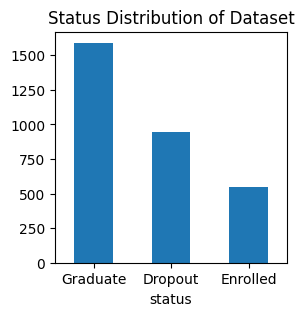

In [ ]:
df_2["status"].value_counts().plot(kind="bar", figsize=(3,3), title="Status Distribution of Dataset")
plt.xticks(rotation=0)
plt.show()

In [ ]:
class_names, y = np.unique(df_2['status'], return_inverse=True)

In [ ]:
print(y)

[2 0 2 ... 2 2 0]


In [ ]:
print(class_names)

['Dropout' 'Enrolled' 'Graduate']


In [ ]:
X = df_2.drop('status', axis=1)

In [ ]:
one_hot_cols = ['marital_status',
                'daytime_evening_attendance',
                'tuition_fees_up_to_date',
                'educational_special_needs',
                'displaced',
                'scholarship_holder',
                'gender',
                'debtor',
                'international',
                ]

for i in one_hot_cols:
    X[i] = X[i].apply(lambda x: float(x))
    X[i] = X[i].apply(lambda x: int(x))

for i in one_hot_cols:
    dum = pd.get_dummies(X[i], prefix=i)
    X.drop([i], axis=1, inplace=True)
    X = pd.concat([X, dum], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train_corr = X_train.copy()
X_train_corr['status'] = y_train

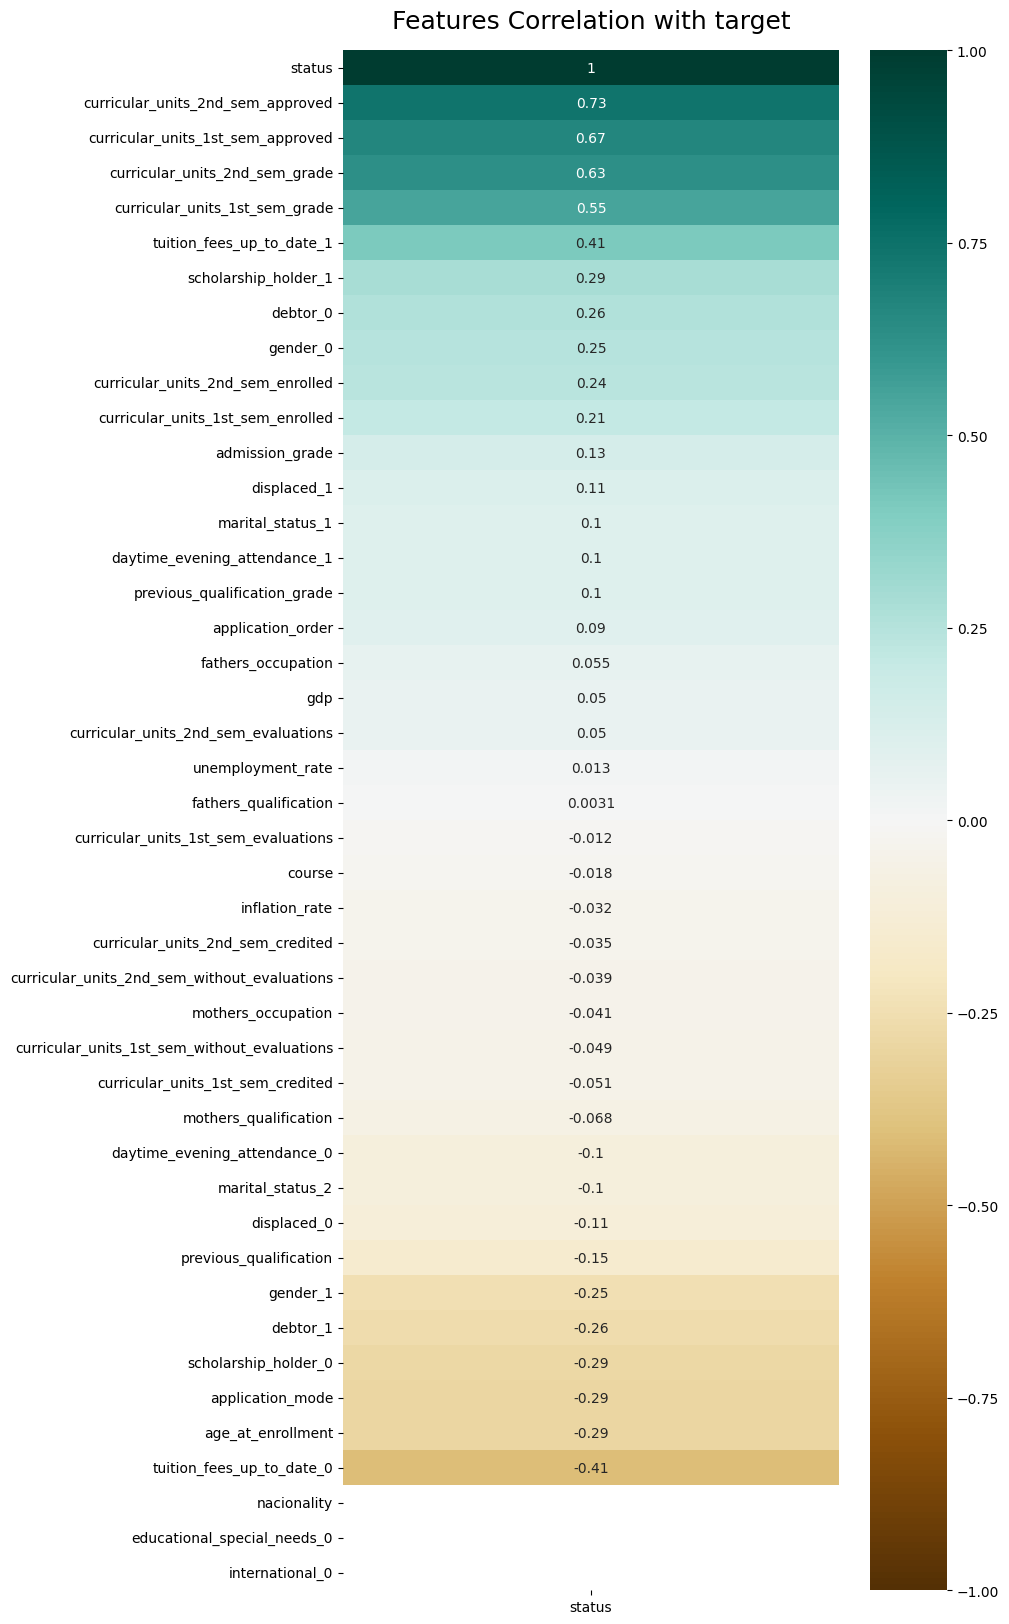

In [ ]:
plt.figure(figsize=(8, 20))
heatmap = sns.heatmap(X_train_corr.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlation with target', fontdict={'fontsize':18}, pad=16);

In [ ]:
features_list = ['curricular_units_2nd_sem_approved',
                 'curricular_units_1st_sem_approved',
                 'curricular_units_2nd_sem_grade',
                 'curricular_units_1st_sem_grade',
                 'tuition_fees_up_to_date_1',
                 'scholarship_holder_1',
                 'debtor_0',
                 'gender_0',
                 'curricular_units_2nd_sem_enrolled',
                 'curricular_units_1st_sem_enrolled',
                 'tuition_fees_up_to_date_0',
                 'age_at_enrollment',
                 'application_mode',
                 'scholarship_holder_0',
                 'debtor_1',
                 'gender_1']

In [ ]:
X_train_fs = X_train[features_list]
X_test_fs = X_test[features_list]

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train_fs)

X_train_sc = scaler.transform(X_train_fs)
X_test_sc = scaler.transform(X_test_fs)

In [ ]:
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train_fs.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test_fs.columns)

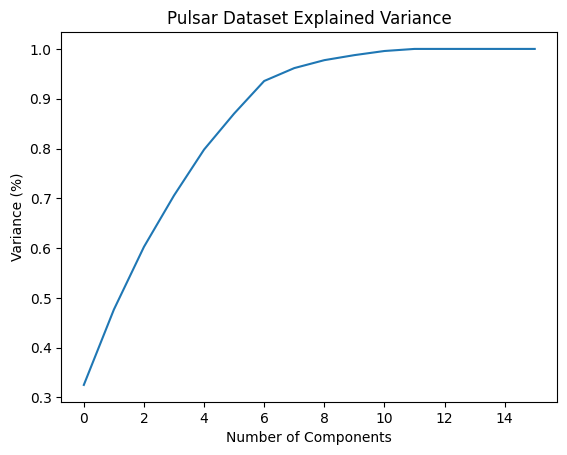

In [ ]:
pca = PCA().fit(X_train_sc)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [ ]:
num_pca = 11
pca = PCA(n_components=num_pca, whiten=True).fit(X_train_sc)
X_train_pc = pca.transform(X_train_sc)
X_test_pc = pca.transform(X_test_sc)

In [ ]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))
class_weights

{0: 1.0893015030946065, 1: 1.837434750186428, 2: 0.6503035101609923}

### **Modeling**

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(11, )))

  for i in range(hp.Int('num_layers', 1, 10)):
    reg = l1_l2(l1=hp.Float('l1_' + str(i), min_value=1e-5, max_value=1e-2, sampling='log'),
                l2=hp.Float('l2_' + str(i), min_value=1e-5, max_value=1e-2, sampling='log'))
    model.add(Dense(hp.Int('units_' + str(i), min_value=2, max_value=100, step=2),
                    activation=hp.Choice('activation_' + str(i), values=['relu','tanh','sigmoid']),
                    kernel_regularizer=reg))
    model.add(Dropout(hp.Choice('dropout_' + str(i), values=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))

  model.add(Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=25,
    executions_per_trial=20,
    project_name='hyper_tuning'
)

In [ ]:
tuner.search(X_train_pc, y_train, epochs=3, batch_size=16,
             class_weight=class_weights, verbose=0,
             validation_data=(X_test_pc, y_test))

### **Evaluation**

In [ ]:
models = tuner.get_best_models(num_models=10)
best_model = models[9]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 11)                0         
                                                                 
 dense (Dense)               (None, 4)                 48        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 70)                350       
                                                                 
 dropout_1 (Dropout)         (None, 70)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 213       
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 

In [ ]:
tuner.results_summary()

Results summary
Results in ./hyper_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 14 summary
Hyperparameters:
num_layers: 3
l1_0: 0.001723860326670305
l2_0: 0.002147845951488028
units_0: 16
activation_0: sigmoid
dropout_0: 0.1
l1_1: 0.0010070857249759378
l2_1: 0.00012588683708669783
units_1: 62
activation_1: relu
dropout_1: 0.3
l1_2: 0.0032063900177478543
l2_2: 2.553582469744244e-05
units_2: 82
activation_2: tanh
dropout_2: 0.7
l1_3: 4.020544295342732e-05
l2_3: 8.784786381624872e-05
units_3: 44
activation_3: tanh
dropout_3: 0.2
l1_4: 2.426072646858585e-05
l2_4: 1.3679132203294389e-05
units_4: 22
activation_4: tanh
dropout_4: 0.4
l1_5: 0.0019329842445407132
l2_5: 0.0020546218197014855
units_5: 90
activation_5: relu
dropout_5: 0.2
l1_6: 0.001804552555693499
l2_6: 1.3317982180566258e-05
units_6: 8
activation_6: sigmoid
dropout_6: 0.8
l1_7: 0.00026076926140610135
l2_7: 0.0001299550085175304
units_7: 4
activation_7: tanh
dropout_7: 0.1
l1_8: 3.122184521

In [ ]:
earlys = EarlyStopping(monitor='val_loss', verbose=1, patience=20)

In [ ]:
history = best_model.fit(X_train_pc, y_train, epochs=500, batch_size=64,
                    class_weight=class_weights, verbose=0,
                    validation_data=(X_test_pc, y_test), callbacks=[earlys])

score = best_model.evaluate(X_test_pc, y_test, verbose=0)
print('Test Loss', score[0])
print('Test Accuracy', score[1])

Epoch 27: early stopping
Test Loss 1.0799133777618408
Test Accuracy 0.6758508682250977


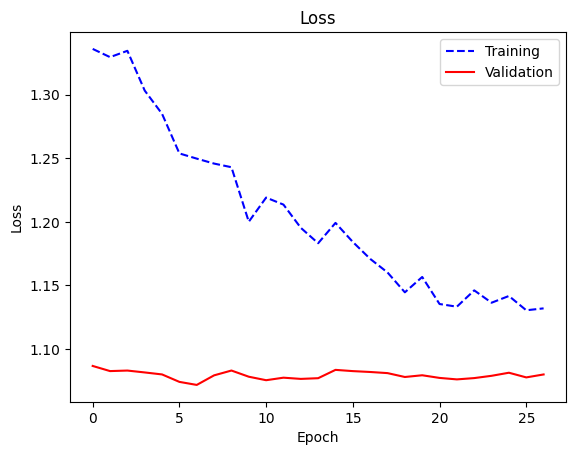

In [ ]:
df_hist = pd.DataFrame.from_dict(history.history)
df_hist['loss'].plot(style='b--', label='Training')
df_hist['val_loss'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

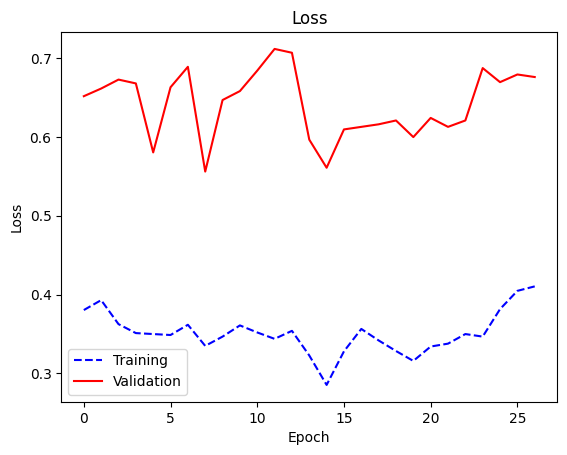

In [ ]:
df_hist['accuracy'].plot(style='b--', label='Training')
df_hist['val_accuracy'].plot(style='r-', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss')
plt.show()

In [ ]:
y_pred = best_model.predict(X_test_pc)
y_pred_labels = np.argmax(y_pred, axis=1)

20/20 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, y_pred_labels, target_names=class_names))

              precision    recall  f1-score   support

     Dropout       0.87      0.62      0.73       190
    Enrolled       0.22      0.26      0.24        99
    Graduate       0.75      0.83      0.79       328

    accuracy                           0.68       617
   macro avg       0.61      0.57      0.58       617
weighted avg       0.70      0.68      0.68       617

